# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [402]:
%matplotlib inline

from scipy import stats 
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [268]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

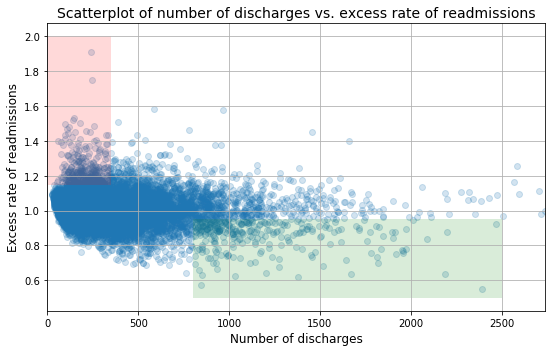

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above.    
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Solution

**Part A**

Summary: I don't agree with the above analysis. 

The author's graphical analysis A is misleading, because the overall conclusion the author made is only based on two selected data groups from the plot, the upper left (shaded red) and the lower right (shaded green) areas, while ignoring all the other majority data. So the overall conclustion that the rate of readmissions is trending down with increasing number of discharges is biased.

In the author's statistics analysis B, it calculates the means excess readmission rate and percentage of excess readmission rate greater than 1, just for the hospitals whose number of discharges < 100, and > 1000. The author's method of grouping hospitals is rough and missing the data points between 100 and 1000, and to get more useful information about the excess readmission, I will generate finer divisions and analyze the entire dataset. 


Since the author's analysis is biased and incomplete, the conclusion C and recommendation D are unfound and further analysis is needed.

**Part B**

(1-3)

To test whether the excess readmission rate is affected by the number of discharges, I will build a $z$ proportion statistic test: 
+ null hypothesis is excess readmission rate is not affected by the number of discharges, which assums the probalities of excess readmission rate larger than 1 are the same regardless of the number of discharges;
+ alternate hypothesis is excess readmission rate is significantly affected by the the number of discharges, that the probabilities of excess readmission rate larger than 1 are different.

The p value of the excess readmission rate larger than 1 is *3.21e-6*, which is smaller than the statistical significance *0.01*. So we reject the null hypothesis that the excess readmission rate is not affected by the number of discharges.

Also it's calculated that the correlation coefficient between the excess readmission rate and the nubmer of discharges is *-0.0974*, which is slightly negative and close to zero, indicating that they are weakly negatively correlated.

In [420]:
# further clean the data by removing the NaNs
df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
# sample size
n = len(df)
# assign shorter names to the columns of the number of discharges and excess readmission ratio
discharge = df['Number of Discharges']
excess = df['Excess Readmission Ratio']
excess_small = excess[:round(n/2)]
excess_large = excess[round(n/2):]
# the entire sampling distribution proportion of excess readmission rate larger than 1
p0 = len(excess[excess > 1]) / n
# separate the sample into two groups (sorted by discharges), and get the proportion of excess readmission rate
# larger than 1 of each group
p1 = len(excess_small[excess_small > 1]) / len(excess_small)
p2 = len(excess_large[excess_large > 1]) / len(excess_large)   
# the standard deviation of sampling distribution
sigma = np.sqrt(p0* (1 - p0) *(1/len(excess_small) + 1/len(excess_large)))
# z-score 
z_score = (p1 - p2) / sigma
pval = stats.norm.sf(abs(z_score)) * 2
pval

3.2136054710081977e-06

In [344]:
# correlation coefficient between excess readmission rate and number of discharges
np.corrcoef(discharge, excess)[0][1]

-0.09739794351079353

(4)

Statistical significance is the mathematically defined significance level to measure the p value, and it indicates only that there is sufficient evidence to conclude that an effect exists. Practical significance refers to the magnitude of the effect. However, no statistical test can tell you whether the effect is large enough to be important in your field of study. Instead, you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. 
(http://statisticsbyjim.com/hypothesis-testing/practical-statistical-significance/)

In the above analysis, assuming the statistical significance $\alpha$=0.01, the p value calculated from $z$ proportion statistic test is smaller than $\alpha$, that we reject the null hypothesis. While if practical significance is 1.0e-6, we can't reject the null hypothesis. 


(5)

The scatter plot above contains all the original data points of the number of discharges and excess readmission rate, which is helpful get a very first and overall impression about the dataset, but it's not powerful to make analysis and conclusions since the plot shows too many unordered scatters. 

In the following cell, I first grouped the excess readmission rate by the number of discharges and calculate the mean rate in each group, and the plot the the mean excess readmission rate vs. the number of discharge. When the number of discharges is small (< 100), the mean excess readmission rate reduces as the number of discharges increases (red shaded area); while the number of discharges is larger (> 100), the mean excess readmission rate is more and more spread as the discharges grows, and the slope of red regression line is slightly negative (-3e-5).

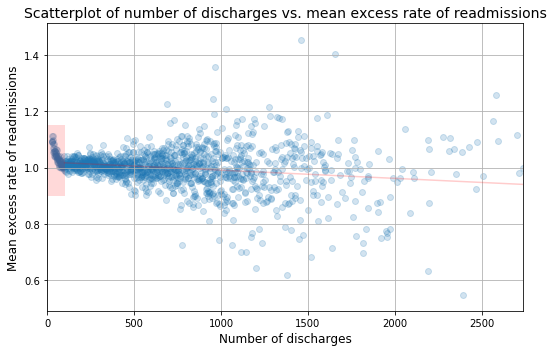

In [307]:
# group the excess readmission rate by the number of discharges, and get the mean rate of each different discharges
discharge_unique = np.array(df['Number of Discharges'].unique())
excess_mean = np.array(df.groupby('Number of Discharges')['Excess Readmission Ratio'].mean())
# plot the grpuped mean excess readmission ratio vs. discharges
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(discharge_unique, excess_mean,alpha=0.2)

ax.fill_between([0,100], 0.9, 1.15, facecolor='red', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Mean excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. mean excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
# linear regression
a, b = np.polyfit(discharge_unique, excess_mean,1)
xp = np.linspace(100, 3000, 1000)
yp = b + a * xp
ax.plot(xp, yp,alpha=0.2, color='red')

To further complete the author's analysis B, I separate the number of discharges to 69 intervals evenly, from 0 to 6900, 100 apart of each other; group the excess rate by the intervals, and calculate the mean excess rate and the ratio of excess rate larger than 1 in each interval.

From the following figure, we can see that both mean excess rate and the ratio of excess rate larger than 1 are pretty flat and slightly reduce before the number of discharges reaches 1700; and both of the ratio drop between 1700 and 2000 discharges; and then both of them increase as the number of discharges increases after the big drop. 

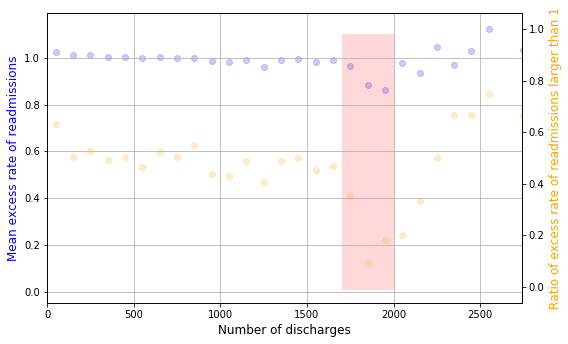

In [336]:
# calculate the mean excess readmission rate and the ratio of rate larger than 1, for every 100 discharges' interval
excess_mean_int = np.empty(69)
discharge_int = np.empty(69)
excess_over_1 = np.empty(69)
for i in range(69):
    excess_interval = df[np.logical_and(df['Number of Discharges'] >= 100 * i,
                        df['Number of Discharges'] < 100 * (i+1))]['Excess Readmission Ratio']
    discharge_int[i] = 100 * i + 50
    excess_mean_int[i] = excess_interval.mean()
    if len(excess_interval) !=0:
        excess_over_1[i] = len(excess_interval[excess_interval > 1]) / len(excess_interval)
# clean the intervals where contains 0 excess readmission rate
discharge_int = discharge_int[np.isfinite(excess_mean_int)]
excess_over_1 = excess_over_1[np.isfinite(excess_mean_int)]
excess_mean_int = excess_mean_int[np.isfinite(excess_mean_int)]
# plot the mean excess rate and the ratio of the rate larger than 1 
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.scatter(discharge_int, excess_mean_int,alpha=0.2, color='blue')
ax1.set_xlabel('Number of discharges', fontsize=12)
ax1.set_ylabel('Mean excess rate of readmissions', fontsize=12, color='blue')
ax1.fill_between([1700,2000], 0.01, 1.1, facecolor='red', alpha = .15, interpolate=True)
ax1.set_xlim([0, max(x)])
ax1.grid(True)

ax2 = ax1.twinx()
ax2.scatter(discharge_int, excess_over_1,alpha=0.2, color='orange')
ax2.set_xlabel('Number of discharges', fontsize=12)
ax2.set_ylabel('Ratio of excess rate of readmissions larger than 1', fontsize=12, color='orange')
ax2.set_xlim([0, max(x)])

fig.tight_layout()
plt.show()

**Conclusions and Recommendations**

Based on the above analysis, we can conclude that:

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates for small capacity (< 100).
+ The weak negative corralation shows that smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
+ One of the furture study directon: to find the reason of the readmission rate drop in hospitals/facilities with capacity between 1700 and 2000.

Recommendations:

+ We need to get involve professionals in medical/hospitals industry, to check the effect size of the number of discharges on excess readmission rate, before deliverying recommendations to regulatory policy.